<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Monte_Carlo_Crudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def g(x):
    return np.sqrt(np.arctan(x))

In [9]:
def calcular_convergencia_esperanza(a, b, max_muestras):

    # Generar muestras aleatorias
    np.random.seed(42)  # Para reproducibilidad
    X = np.random.uniform(a, b, max_muestras)

    # Calcular g(x) para todas las muestras
    Y = g(X)

    # Calcular esperanzas acumulativas
    esperanzas_acumulativas = np.cumsum(Y) / np.arange(1, max_muestras + 1)

    # Desviación estándar de la media
    std_error = np.zeros(max_muestras)
    for i in range(1, max_muestras + 1):
        std_error[i-1] = np.std(Y[:i]) / np.sqrt(i)

    # Intervalos de confianza (±1.96 * error estándar)
    intervalo_superior = esperanzas_acumulativas + 1.96 * std_error
    intervalo_inferior = esperanzas_acumulativas - 1.96 * std_error

    return esperanzas_acumulativas, intervalo_inferior, intervalo_superior

In [10]:
def graficar_convergencia(a, b, max_muestras):
    """
    Grafica la convergencia de la esperanza estimada
    """
    # Calcular convergencia
    esperanzas, intervalo_inf, intervalo_sup = calcular_convergencia_esperanza(a, b, max_muestras)

    plt.figure(figsize=(12, 6))

    # Graficar esperanza acumulativa
    plt.plot(range(1, max_muestras + 1), esperanzas,
             label='Esperanza Estimada', color='blue', linewidth=2)

    # Graficar la varianza
    plt.fill_between(range(1, max_muestras + 1),
                     intervalo_inf, intervalo_sup,
                     color='lightblue', alpha=0.3,
                     label='Intervalo de Confianza (95%)')

    #gráfica
    plt.title('Convergencia de la Esperanza de g(x) = √(arctan(x))', fontsize=14)
    plt.xlabel('Número de Muestras', fontsize=12)
    plt.ylabel('Esperanza Estimada', fontsize=12)
    plt.xscale('log')  # Escala logarítmica para x
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()

    # Mostrar la gráfica final
    plt.tight_layout()
    plt.show()


In [11]:
def main():
    # Parámetros
    a = 0  # Límite inferior
    b = 1  # Límite superior
    max_muestras = 100  # Número máximo de muestras

    # Graficar convergencia
    graficar_convergencia(a, b, max_muestras)

    # Cálculo del valor final
    esperanzas_final, inf_final, sup_final = calcular_convergencia_esperanza(a, b, max_muestras)
    print("\nResultados finales:")
    print(f"Esperanza estimada: {esperanzas_final[-1]:.6f}")

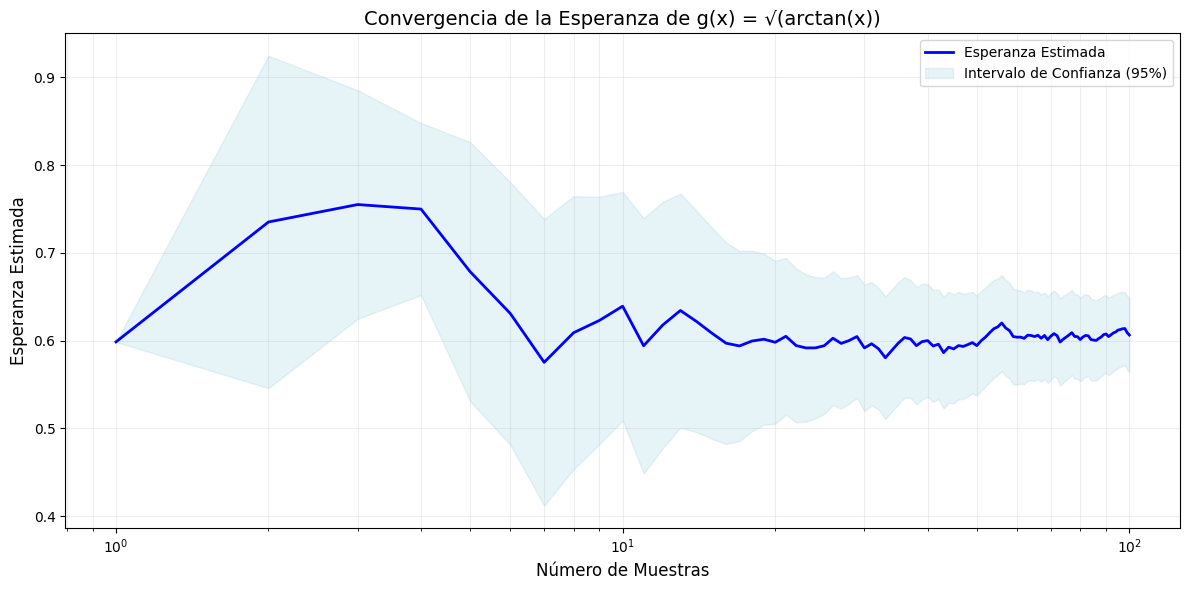


Resultados finales:
Esperanza estimada: 0.606426


In [12]:
# Ejecutar el script
if __name__ == "__main__":
    main()